In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [9]:
df = gpd.read_file('/Users/shivyucel/Downloads/orthophoto-imagery-2015/orthophoto-imagery-2015.shp')

In [12]:
df

,name,mrsid_url,ecw_url,geometry
0,BCVANC15_B11,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.26524 49.26726, -123.26526 49.2..."
1,BCVANC15_B13,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.26519 49.25826, -123.26521 49.2..."
2,BCVANC15_B14,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.26516 49.25377, -123.26519 49.2..."
3,BCVANC15_B15,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.26514 49.24927, -123.26516 49.2..."
4,BCVANC15_B17,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.26509 49.24027, -123.26511 49.2..."
...,...,...,...,...
458,BCVANC15_W6,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.03432 49.29005, -123.03433 49.2..."
459,BCVANC15_W9,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.03431 49.27655, -123.03432 49.2..."
460,BCVANC15_X16,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.02330 49.24507, -123.02330 49.2..."
461,BCVANC15_X26,https://webtransfer.vancouver.ca/opendata/2015...,https://webtransfer.vancouver.ca/opendata/2015...,"POLYGON ((-123.02328 49.20010, -123.02328 49.2..."


<AxesSubplot:>

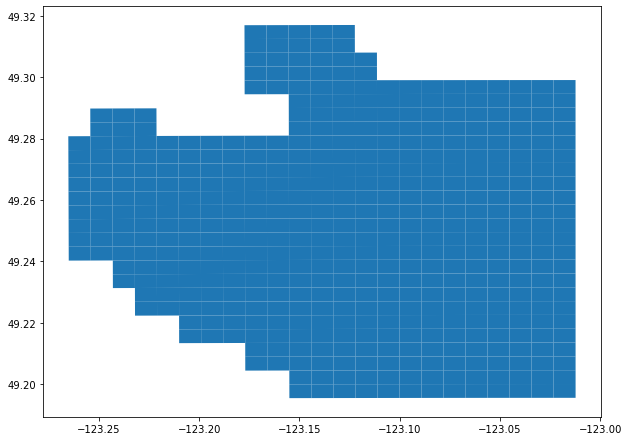

In [13]:
df.plot(figsize=(10,10))

## No Car

In [90]:
df = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clean_files/clean_times/clean_times.shp')

In [82]:
df['propor_nocar'] = df['pop_nocar'] / df['pop']

In [83]:
car_cut = df[['wed_0800', 'sat_0900', 'wed_1100', 'wed_1500', 'propor_nocar']]

In [86]:
car_cut.dropna(inplace=True)

In [87]:
print(pearsonr(car_cut["wed_0800"], car_cut['propor_nocar']))

print(pearsonr(car_cut["wed_1100"], car_cut['propor_nocar']))

print(pearsonr(car_cut["wed_1500"], car_cut['propor_nocar']))

print(pearsonr(car_cut["sat_0900"], car_cut['propor_nocar']))

(-0.06666222684883528, 5.2973748751814764e-05)
(0.013566241910251303, 0.4112363302944228)
(-0.08840750412959066, 8.086580990182677e-08)
(0.043277161021452695, 0.008730112412640167)


## Low-Income Cutoff

In [76]:
df = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clean_files/clean_times/clean_times.shp')

In [77]:
df['propor_low_income'] = df['low_inc'] / df['pop']

In [78]:
inc_cut = df[['wed_0800', 'sat_0900', 'wed_1100', 'wed_1500', 'propor_low_income']]

In [79]:
inc_cut.dropna(inplace=True)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [80]:
print(pearsonr(inc_cut["wed_0800"], inc_cut['propor_low_income']))

print(pearsonr(inc_cut["wed_1100"], inc_cut['propor_low_income']))

print(pearsonr(inc_cut["wed_1500"], inc_cut['propor_low_income']))

print(pearsonr(inc_cut["sat_0900"], inc_cut['propor_low_income']))

(-0.08260039418132359, 6.180349555295752e-07)
(-0.044676750428143126, 0.007075256778823642)
(-0.06168409796782614, 0.0001990385205464951)
(0.022277866825542694, 0.1794375066565603)


### Average Age and Immigration

In [114]:
df = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clean_files/clean_times/clean_times.shp')

In [115]:
census = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/census_data/age_newcomer.csv')

In [116]:
census.columns

Index(['GeoUID', 'Type', 'Region Name', 'Area (sq km)', 'Population',
       'Dwellings', 'Households', 'CSD_UID', 'CD_UID', 'CT_UID', 'CMA_UID',
       'v_CA16_379: Average age',
       'v_CA16_3636: Total - Selected places of birth for the recent immigrant population in private households - 25% sample data'],
      dtype='object')

In [117]:
census = census[['GeoUID', 'v_CA16_379: Average age', 'v_CA16_3636: Total - Selected places of birth for the recent immigrant population in private households - 25% sample data']]

In [118]:
census.columns = ['DAUID', 'avg_age', 'recent_imm']

In [119]:
df = df.merge(census, on='DAUID')

## age

In [123]:
age_cut = df[['wed_0800', 'sat_0900', 'wed_1100', 'wed_1500', 'avg_age']]

In [125]:
age_cut.dropna(inplace=True)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [126]:
print(pearsonr(age_cut["wed_0800"], age_cut['avg_age']))

print(pearsonr(age_cut["wed_1100"], age_cut['avg_age']))

print(pearsonr(age_cut["wed_1500"], age_cut['avg_age']))

print(pearsonr(age_cut["sat_0900"], age_cut['avg_age']))

(0.05673626975315289, 0.0005764479548447546)
(0.03624883176795578, 0.027924845312792292)
(0.054394027302261026, 0.0009663998781541687)
(-0.03032720570253891, 0.06590971578473702)


## immigration

In [128]:
df['imm_propor'] = df['recent_imm'] / df['pop']

In [129]:
imm_cut = df[['wed_0800', 'sat_0900', 'wed_1100', 'wed_1500', 'imm_propor']]

In [130]:
imm_cut.dropna(inplace=True)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [131]:
print(pearsonr(imm_cut["wed_0800"], imm_cut['imm_propor']))

print(pearsonr(imm_cut["wed_1100"], imm_cut['imm_propor']))

print(pearsonr(imm_cut["wed_1500"], imm_cut['imm_propor']))

print(pearsonr(imm_cut["sat_0900"], imm_cut['imm_propor']))

(-0.05376169134152786, 0.0011039629314790955)
(-0.0389807138891977, 0.018040658767064344)
(-0.01895835457684777, 0.2502331155276553)
(-0.02506609726005397, 0.12843383094035674)
